# Statistical Rethinking: Chapter 3 Practice Answers

Note that the answers here might not be exactly in line with what is in the book, since the samples there come from R code.

We use some of the code from [the pymc-devs Python/pymc3 port of the Statistical Rethinking code examples](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/).

### 3E1

In [51]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [52]:
np.random.seed(100)

In the book a seed is set so the samples can be replicated exactly. I guess we could run R and get the exact correct samples.

In [53]:
def posterior_grid_approx_3m1(grid_points=1000, successes=6, tosses=9):
    p_grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)
    likelihood = stats.binom.pmf(successes, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [65]:
num_samples = int(1e4)
p_grid, posterior = posterior_grid_approx_3m1(grid_points=num_samples)

In [66]:
samples = np.random.choice(p_grid, p=posterior, size=num_samples, replace=True)

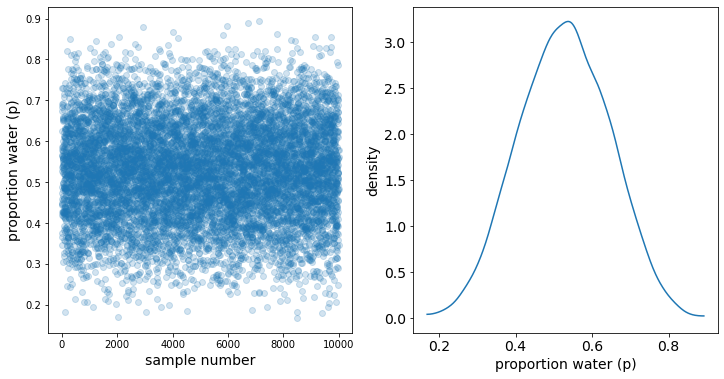

In [116]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

In [71]:
sum(samples < 0.2) / num_samples

0.0003

### 3E2

In [72]:
sum(samples > 0.8) / num_samples

0.1176

### 3E3

In [76]:
sum((samples > 0.2) & (samples <= 0.8)) / num_samples

0.8821

### 3E4

In [85]:
np.percentile(samples, 20)

0.5188318831883189

### 3E5

In [90]:
np.percentile(samples, 80)

0.7595759575957596

### 3E6

In [92]:
az.hdi(samples, hdi_prob=0.66)

array([0.51605161, 0.78517852])

### 3E7

In [103]:
lower = (1-.66)/2
np.percentile(samples, [lower*100, 66+lower*100])

array([0.50063306, 0.77337734])

### 3M1

In [106]:
p_grid, posterior = posterior_grid_approx_3m1(grid_points=num_samples, successes=8, tosses=15)

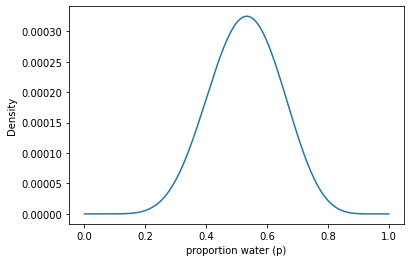

In [115]:
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

### 3M2

In [112]:
samples = np.random.choice(p_grid, p=posterior, size=num_samples, replace=True)

In [114]:
az.hdi(samples, hdi_prob=0.9)

array([0.3320332, 0.7189719])

### 3M3

In [122]:
w = stats.binom.rvs(n=15, p=samples, size=int(1e4))

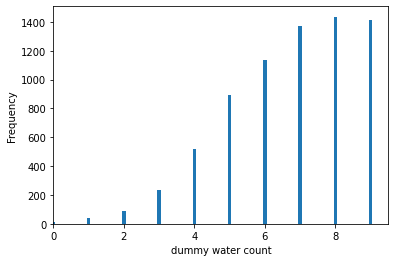

In [131]:
bar_width = 0.1
plt.hist(w, bins=np.arange(0, 11) - bar_width / 2, width=bar_width)
plt.xlim(0, 9.5)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

In [128]:
(w == 8).mean()

0.1436

### 3M4

In [132]:
w = stats.binom.rvs(n=9, p=samples, size=int(1e4))
(w == 6).mean()

0.1731

### 3M5

In [138]:
def posterior_grid_approx_3m5(grid_points=1000, successes=6, tosses=9):
    p_grid = np.linspace(0, 1, grid_points)
    prior = (p_grid >= 0.5)*1
    likelihood = stats.binom.pmf(successes, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [139]:
p_grid, posterior = posterior_grid_approx_3m5(grid_points=num_samples, successes=8, tosses=15)

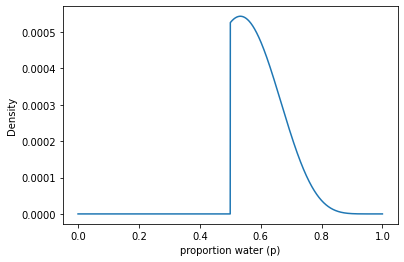

In [140]:
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

In [143]:
samples = np.random.choice(p_grid, p=posterior, size=num_samples, replace=True)

In [144]:
az.hdi(samples, hdi_prob=0.9)

array([0.50005001, 0.71377138])

In [145]:
w = stats.binom.rvs(n=15, p=samples, size=int(1e4))

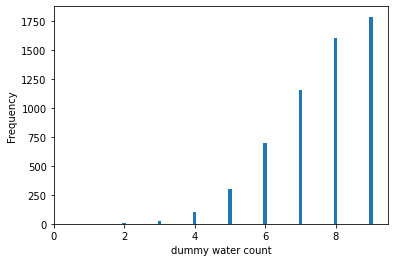

In [146]:
bar_width = 0.1
plt.hist(w, bins=np.arange(0, 11) - bar_width / 2, width=bar_width)
plt.xlim(0, 9.5)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

In [147]:
(w == 8).mean()

0.1603

In [148]:
w = stats.binom.rvs(n=9, p=samples, size=int(1e4))
(w == 6).mean()

0.231

### 3M6

In [206]:
def tosses2width(n):
    # Simulate tossing the globe with the given number of trials and the 'true' ratio.
    obs = stats.binom.rvs(n=n, p=0.7)
    
    # Then do our inference
    p_grid, posterior = posterior_grid_approx_3m1(grid_points=num_samples, successes=obs, tosses=n)

    # Take samples from the distribution
    samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)
    
    # Find the 99% percentile interval and it'd width
    interval = np.percentile(samples, [0.5, 99.5])
    interval_width = interval[1] - interval[0]
    
    return interval_width

In [207]:
y = np.array([tosses2width(n) for n in range(2000, 3000)])

In [208]:
x = range(2000,3000)

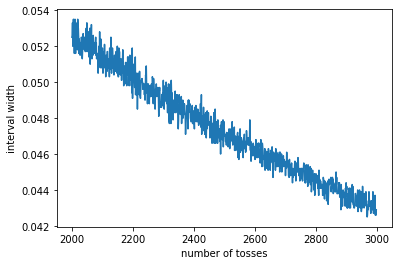

In [210]:
plt.plot(x, y)
plt.xlabel("number of tosses")
plt.ylabel("interval width");

Looks like somewhere between 2200 and 2400 tosses will result in an interval width of 0.05.

## Hard

In [213]:
birth1 = (1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1)
birth2 = (0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0)

### 3H1

In [231]:
p_grid = np.linspace(0,1,num=1000)

In [232]:
prior = np.repeat(1,1000)

In [233]:
num_boys = sum(birth1) + sum(birth2)
total = len(birth1) + len(birth2)

In [234]:
likelihood = stats.binom.pmf(num_boys, total, p_grid)

In [239]:
unstd_posterior = likelihood*prior
posterior = unstd_posterior / unstd_posterior.sum()

Text(0, 0.5, 'density')

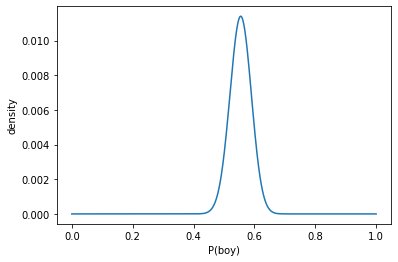

In [245]:
plt.plot(p_grid, posterior)
plt.xlabel('P(boy)')
plt.ylabel('density')

In [251]:
max_ = max(posterior)
p_grid[list(posterior).index(max_)]

0.5545545545545546

### 3H2

In [290]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4))

In [291]:
az.hdi(samples, hdi_prob=.5)

array([0.52552553, 0.57257257])

In [292]:
az.hdi(samples, hdi_prob=.89)

array([0.5005005 , 0.61061061])

In [293]:
az.hdi(samples, hdi_prob=.97)

array([0.47347347, 0.62762763])

### 3H3

In [294]:
w = stats.binom.rvs(n=200, p=samples, size=int(1e4))

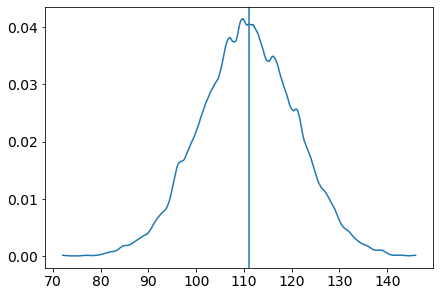

In [295]:
az.plot_kde(w)
plt.axvline(x=num_boys)

Yes, this posterior predictive plot seems to make the observed data very likely.

### 3H4

In [296]:
w = stats.binom.rvs(n=100, p=samples, size=int(1e4))

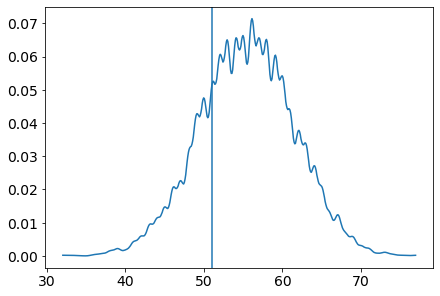

In [299]:
az.plot_kde(w)
plt.axvline(x=sum(birth1))

The actual data observed just from birth1 is not a very central, likely outcome according to the model estimated over all the births. We can conclude that birth1 and birth2 datapoints come from different distributions.

### 3H5

In [301]:
num_girls_birth1 = len(birth1) - sum(birth1)

In [307]:
w = stats.binom.rvs(n=num_girls_birth1, p=samples, size=int(1e4))

In [336]:
num_boys_following_girls = sum((np.array(birth1) == 0) & (np.array(birth2) == 1))

In [337]:
num_girls_birth1

49

In [338]:
num_boys_following_girls

39

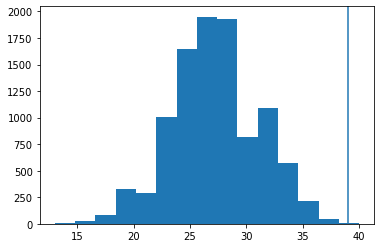

In [332]:
plt.hist(w,bins=15)
plt.axvline(x=num_boys_following_girls)

Surprisingly, of the 49 cases where the first birth was a girl, 39 of them were followed by a boy! This can't be right, as it suggests the births are not IID. Somehow a birth being a girl makes it more likely the next one will be a boy.

We're seeing that the number of boys in the first birth is roughly equal to that of the number of girls, but in the second birth, boys are far more common.

My hypothesis is that the first child is accepted by the parents regardless of gender, but that cultural pressure to have boys results in frequent infanticide if more than one girl is born. The infanticide is kept secret, so those latent girl births (that are in fact I.I.D) are never recorded.